<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Дарья! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

# Проект: Обучение с учителем. HR-аналитика

# Описание проекта:

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. 

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

Проект состоит из решения двух задач: задача линейной регрессии и задача бинарной классификации. Первая задача состоит в том, чтобы построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
Вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Решение первой задачи: 

    Шаг 1. Загрузка данных  

    Шаг 2. Предобработка данных  

    Шаг 3. Исследовательский анализ данных   

    Шаг 4. Подготовка данных  

    Шаг 5. Обучение моделей  
    
    Шаг 6. Оформление выводов  

Решение второй задачи: 

    Шаг 1. Загрузка данных  

    Шаг 2. Предобработка данных  

    Шаг 3. Исследовательский анализ данных   

    Шаг 4. Добавление нового входного признака  
    
    Шаг 5. Подготовка данных
    
    Шаг 6. Обучение моделей  
    
    Шаг 7. Выводы


In [1]:
!pip install --upgrade optuna scikit-learn -q
!pip install phik -q
!pip install shap -q
!pip install imblearn -q
!pip install python-math -q



In [2]:
import os
import re
import phik
import shap
import warnings

from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

<font color='blue'><b>Комментарий ревьюера : </b></font> ⚠️\
<font color='darkorange'> Пипы лучше размещать отдельно от импортов, что бы не запускать этот код, если понадобится дополнять или редактировать импорты.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Все импорты должны быть в первых  ячейках татрадки, что бы сразу были видны все зависимости кода.</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

# Решение первой задачи. 

## Загрузка данных.

Загрузим датасеты train_job_satisfaction_rate, test_features, test_target_job_satisfaction_rate.

In [3]:
#настройка параметров отображения графиков
plt.rcParams["figure.figsize"] = (8, 8)

pth_train_job_satisfaction_rate = '/datasets/train_job_satisfaction_rate.csv'
pth_test_features = '/datasets/test_features.csv'
pth_test_target_job_satisfaction_rate = '/datasets/test_target_job_satisfaction_rate.csv'

if os.path.exists(pth_train_job_satisfaction_rate):
    train_job_satisfaction_rate = pd.read_csv(pth_train_job_satisfaction_rate, sep=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth_test_features):
    test_features = pd.read_csv(pth_test_features, sep=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth_test_target_job_satisfaction_rate):
    test_target_job_satisfaction_rate = pd.read_csv(pth_test_target_job_satisfaction_rate, sep=',')
else:
    print('Something is wrong')

Напишем функцию для получения информации по датасетам.

In [4]:
def data_info(data):
    print("Общая информация о датасете:\n")
    data.info()
    print("\n5 случайных строк их датасета:\n")
    display(data.sample(5))
    print("\nОписание данных:\n")
    display(data.describe().T)
    print("\nКоличество пропусков:\n")
    display(data.isna().sum())
    print("\nКоличество явных дубликатов:\n")
    display(data.duplicated().sum())

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Метод info выведет информацию и без display. display, в данном случае, печатает только слово None в аутпутах.
</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

### Датасет train_job_satisfaction_rate:

    id — уникальный идентификатор сотрудника;
    dept — отдел, в котором работает сотрудник;
    level — уровень занимаемой должности;
    workload — уровень загруженности сотрудника;
    employment_years — длительность работы в компании (в годах);
    last_year_promo — показывает, было ли повышение за последний год;
    last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
    supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
    salary — ежемесячная зарплата сотрудника;
    job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

In [5]:
data_info(train_job_satisfaction_rate)

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB

5 случайных строк их датасета:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
3665,704545,sales,middle,low,6,no,no,4,24000,0.89
1413,463527,hr,sinior,medium,9,no,no,3,46800,0.38
132,891640,hr,junior,medium,2,no,no,4,22800,0.69
2005,412638,purchasing,middle,high,6,no,yes,1,51600,0.24
2410,611256,sales,junior,low,3,no,no,3,18000,0.56



Описание данных:



,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0



Количество пропусков:



id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


Количество явных дубликатов:



0

Вывод: признаки 'dept' и 'level' имеют пропуски, устранением которых займемся на следующем шаге.
Явных дубликатов нет, данные на первый взгляд выглядят нормально. 

### Датасает test_features

In [6]:
data_info(test_features)

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB

5 случайных строк их датасета:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
686,523912,purchasing,sinior,medium,8,no,no,5,54000
1688,524540,sales,junior,low,1,no,no,4,12000
886,128727,technology,middle,high,3,no,yes,4,63600
730,203250,technology,junior,medium,3,no,no,4,27600
105,143187,sales,junior,medium,1,no,yes,3,27600



Описание данных:



,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0



Количество пропусков:



id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


Количество явных дубликатов:



0

Имеются пропуски в столбцах dept и level - займемся ими на следующих этапах. На первый взгляд данные выглядят нормально.

### Датасет test_target_job_satisfaction_rate

In [7]:
data_info(test_target_job_satisfaction_rate)

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB

5 случайных строк их датасета:



,id,job_satisfaction_rate
133,190259,0.29
1984,180426,0.82
1819,128739,0.30
169,746619,0.35
1377,576747,0.66



Описание данных:



,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0



Количество пропусков:



id                       0
job_satisfaction_rate    0
dtype: int64


Количество явных дубликатов:



0

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Шаг 2. Предобработка данных


Сначала для всех датасетов сразу приведем наименования столбцов к одному виду:

In [8]:
# Пайплайн для замены пропущенных значений
imputer_pipe = Pipeline(
    [
        (
            'SimpleImputer',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ]
)

In [9]:
dfs = [
    train_job_satisfaction_rate,
    test_features,
    test_target_job_satisfaction_rate
]

for df in dfs:
    df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in df.columns]
    print(df.columns)

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')
Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')
Index(['id', 'job_satisfaction_rate'], dtype='object')


### Датасет train_job_satisfaction_rate

In [10]:
[{i: list(train_job_satisfaction_rate[i].unique())} for i in train_job_satisfaction_rate.columns if train_job_satisfaction_rate[i].dtype == 'object']

[{'dept': ['sales', 'hr', 'technology', 'purchasing', 'marketing', nan]},
 {'level': ['junior', 'middle', 'sinior', nan]},
 {'workload': ['medium', 'high', 'low']},
 {'last_year_promo': ['no', 'yes']},
 {'last_year_violations': ['no', 'yes']}]

In [11]:
#исправим опечатку
train_job_satisfaction_rate['level'].replace({'sinior': 'senior'}, inplace=True)

In [12]:
train_job_satisfaction_rate[train_job_satisfaction_rate['dept'].isnull() | train_job_satisfaction_rate['level'].isnull()]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


Т.к. переменные dept и level - категориальные, то заполнение их наиболее частыми значениями нелогично, модель обучится неправильно. Строк немного, поэтому можем удалить их из обучающей выборки. 

In [13]:
#train_job_satisfaction_rate = train_job_satisfaction_rate.query("dept.notnull() & level.notnull()")

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red">~~Для корректной кросс-валидации, заполнение пропусков нужно объединить с обучением моделей через Pipeline, для избегания утечек между обучающими и валидационными подвыборками.~~</span>\
<span style="color: blue">На данном этапе достаточно обнаружить пропуски и объявить какими инструментами и стратегиями они будут обрабатыватьсся в Пайплайне.</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [14]:
# Обработаем пропущенные значения при помощи пайплайна
nan_cols = ['dept', 'level', 'workload']
train_job_satisfaction_rate[nan_cols] = imputer_pipe.fit_transform(train_job_satisfaction_rate[nan_cols])

In [15]:
train_job_satisfaction_rate.shape

(4000, 10)

### Датасет test_features

In [16]:
#исправим опечатку
test_features['level'].replace({'sinior': 'senior'}, inplace=True)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [17]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [18]:
test_features.query('dept == " "')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [19]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [20]:
test_features[nan_cols] = imputer_pipe.fit_transform(test_features[nan_cols])

In [21]:
#т.к. строк с пропущенными значениями малоб то мы можем удалить их - это будет лучше, чем заполнять какими-либо значениями (например, часто встречающимися)
#test_features = test_features.query("dept.notnull() & level.notnull()")
#test_features = test_features.query('dept != " "')

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Тестовую выборку нельзя фильтровать. Это лишает её репрезентативности.~~</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>  ~~Здорово, что отмечено новое значение в категориях, но такие значения нужно обработать в Пайплайн, инструментами Энкодеров.~~</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [22]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', ' '],
      dtype=object)

In [23]:
test_features['level'].unique()

array(['junior', 'middle', 'senior'], dtype=object)

In [24]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [25]:
test_features.query('workload == " "')

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


In [26]:
#test_features = test_features.query('workload != " "')
#test_features['workload'].unique()

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [27]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

### Датасет test_target_job_satisfaction_rate

In [29]:
test_target_job_satisfaction_rate.query('job_satisfaction_rate < 0')

,id,job_satisfaction_rate


Вывод: проверили значения в тестовой выборке целевой переменной на адекватность.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Исследовательский анализ данных

### Датасет train_job_satisfaction_rate

In [30]:
display(train_job_satisfaction_rate.head())
train_job_satisfaction_rate.describe().T

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


In [31]:
def hist_show(data, column, bins, measure=''):
    data[column].hist(alpha=0.3, legend=True, bins=bins)
    plt.title('График распределения величины ' + column)
    plt.xlabel(column + measure)
    plt.ylabel('кол-во ...')
    plt.show()
    plt.title('Боксплот величины ' + column)
    plt.ylabel(column + measure)
    plt.boxplot(x=data[column]);

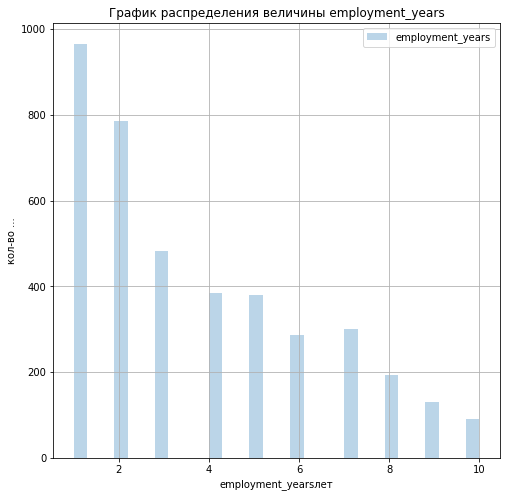

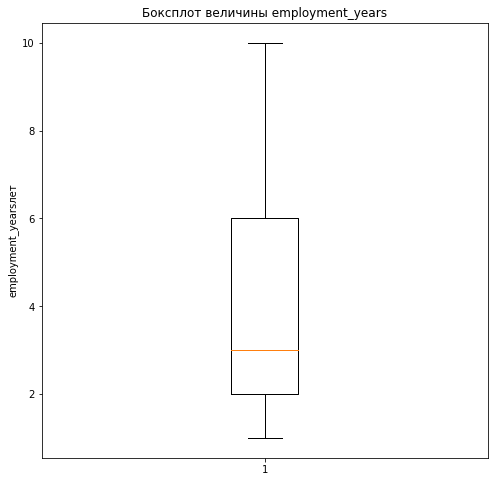

In [32]:
hist_show(train_job_satisfaction_rate, 'employment_years', bins=30, measure='лет')

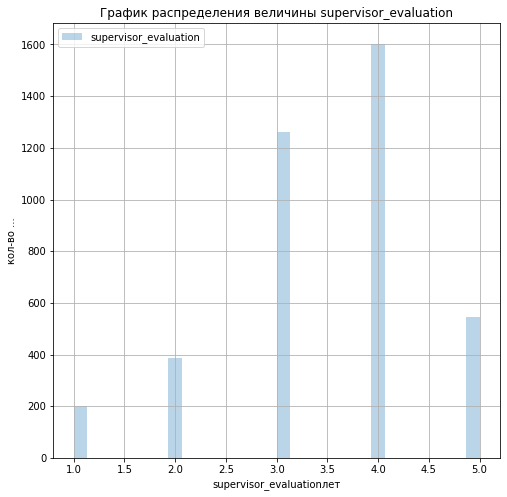

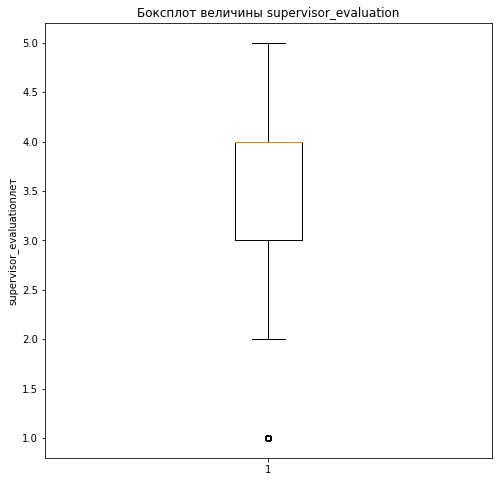

In [33]:
hist_show(train_job_satisfaction_rate, 'supervisor_evaluation', bins=30, measure='лет')

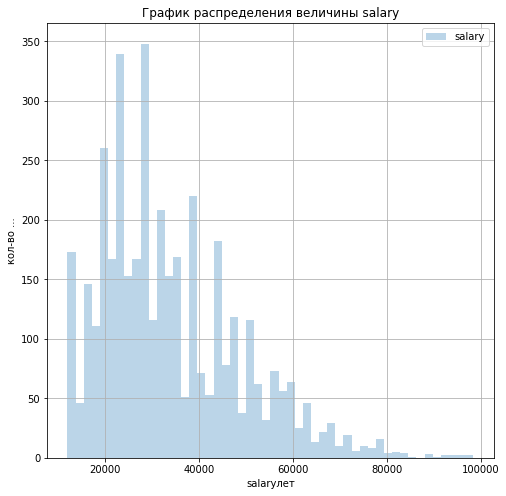

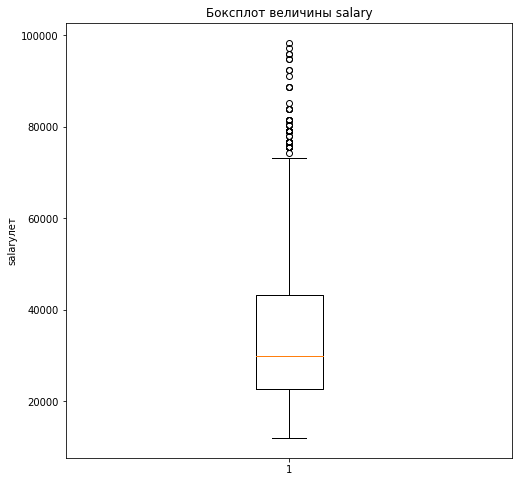

In [34]:
hist_show(train_job_satisfaction_rate, 'salary', bins=50, measure='лет')

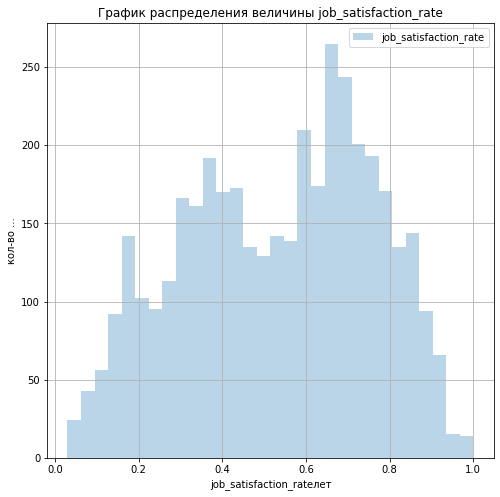

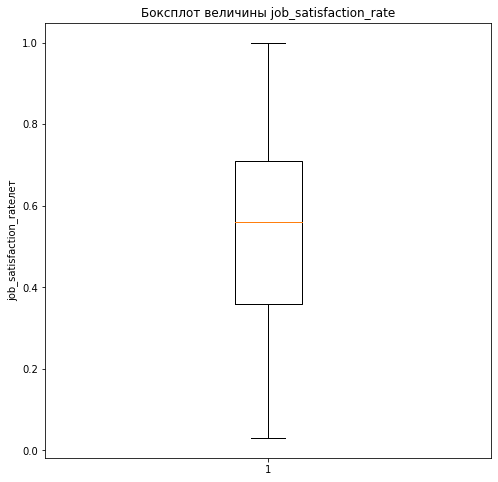

In [35]:
hist_show(train_job_satisfaction_rate, 'job_satisfaction_rate', bins=30, measure='лет')

### Датасет test_features

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что сравниваешь выборки!</font>

In [36]:
test_features.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

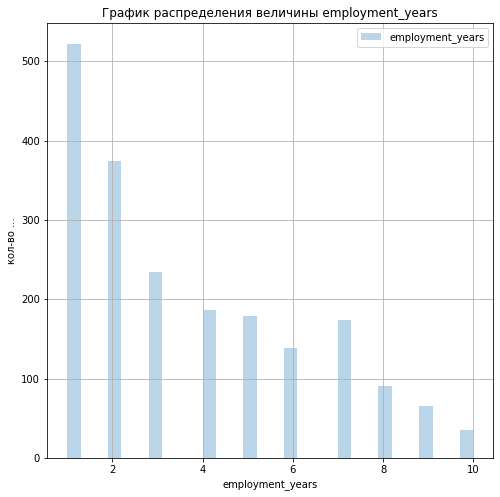

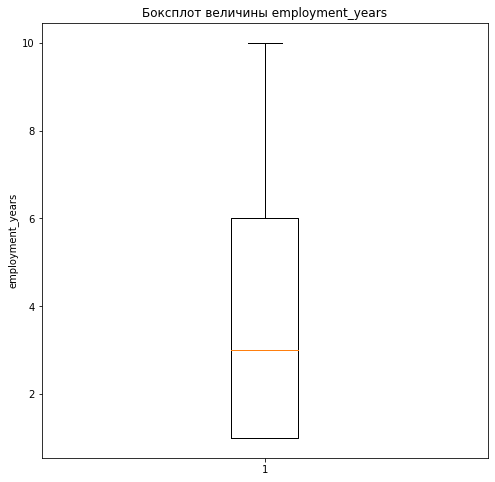

In [37]:
hist_show(test_features, 'employment_years', bins=30)

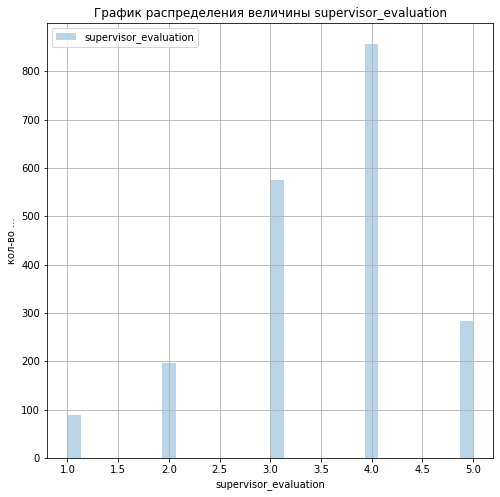

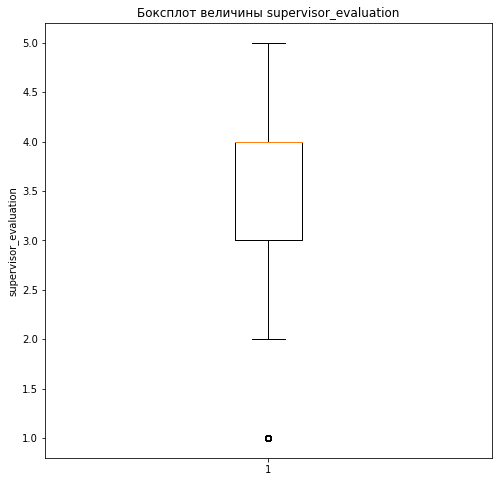

In [38]:
hist_show(test_features, 'supervisor_evaluation', bins=30)

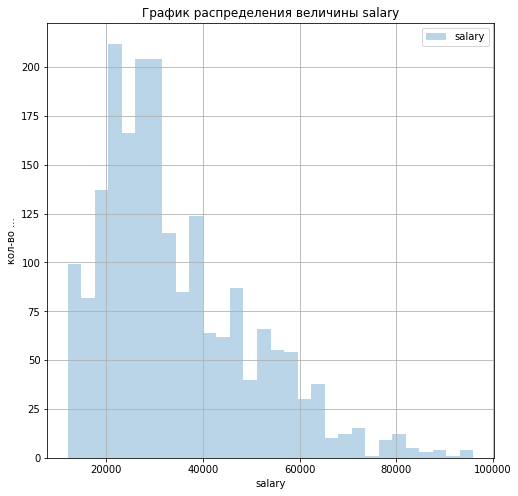

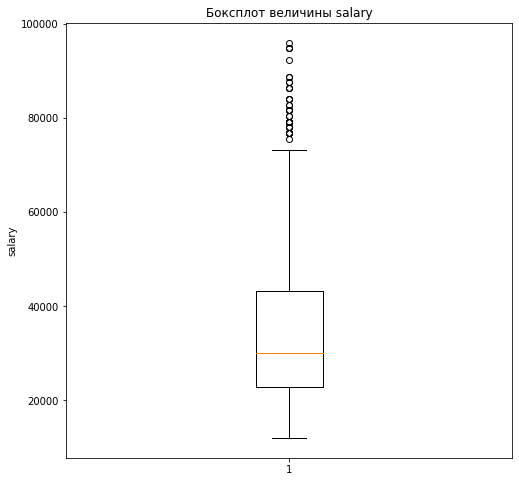

In [39]:
hist_show(test_features, 'salary', bins=30)

### Датасет test_target_job_satisfaction_rate

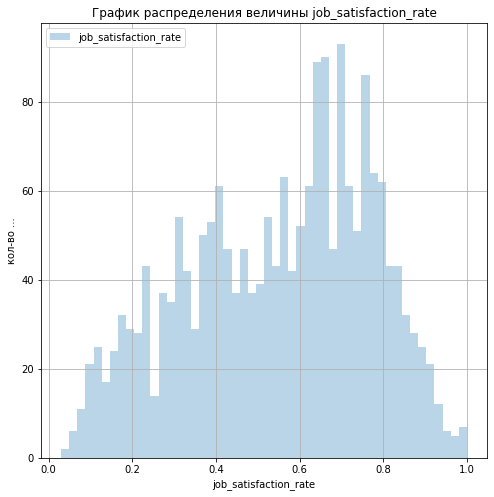

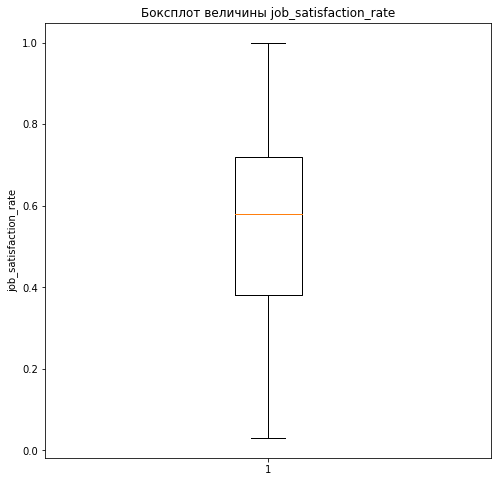

In [40]:
hist_show(test_target_job_satisfaction_rate, 'job_satisfaction_rate', bins=50)

### Категориальные признаки

In [41]:
def category_info(data, column):
    data.groupby(column).sum().plot(kind='pie', y='id', autopct='%1.0f%%',
     colors = plt.cm.Set3(np.linspace(0, 1, len(data[column].unique()))),
     title='Points Scored by Team') 
    plt.title('Диаграмма распределения')

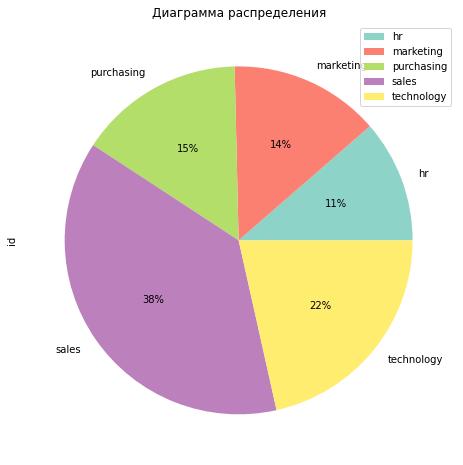

In [42]:
category_info(train_job_satisfaction_rate, 'dept')

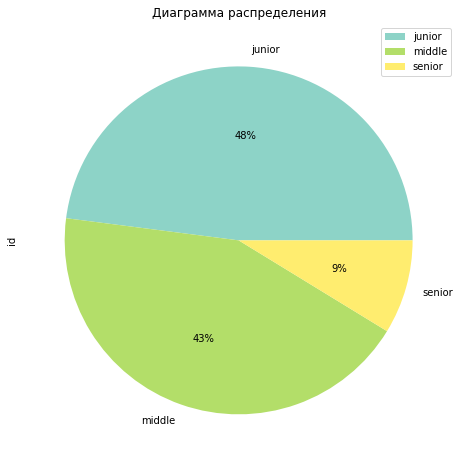

In [43]:
category_info(train_job_satisfaction_rate, 'level')

Вывод: наблюдается дисбаланс - класс senior представляет всего 9% от выборки.

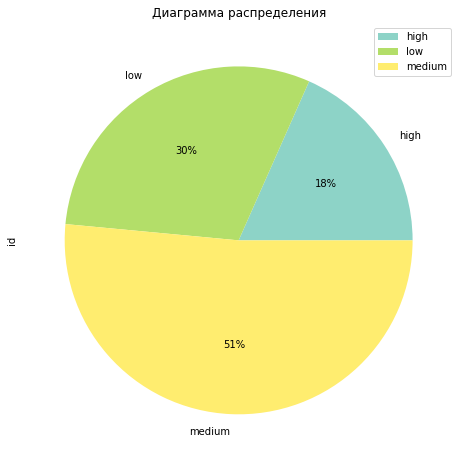

In [44]:
category_info(train_job_satisfaction_rate, 'workload')

Вывод: наблюдается дисбаланс - класс medium представляет 51% от выборки.

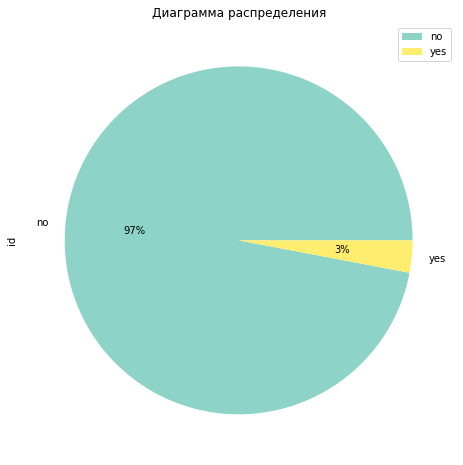

In [45]:
category_info(train_job_satisfaction_rate, 'last_year_promo')

Вывод: наблюдается дисбаланс - класс yes представляет всего 3% от выборки.

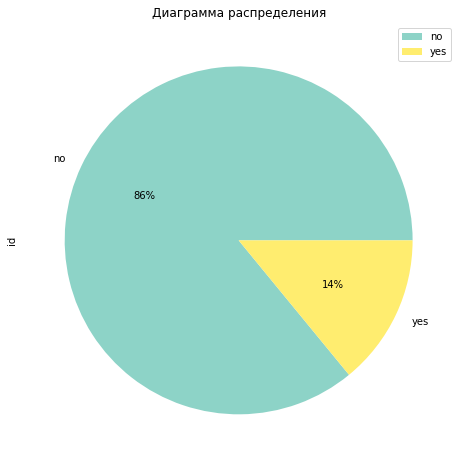

In [46]:
category_info(train_job_satisfaction_rate, 'last_year_violations')

Вывод: наблюдается дисбаланс - класс yes представляет всего 14% от выборки.

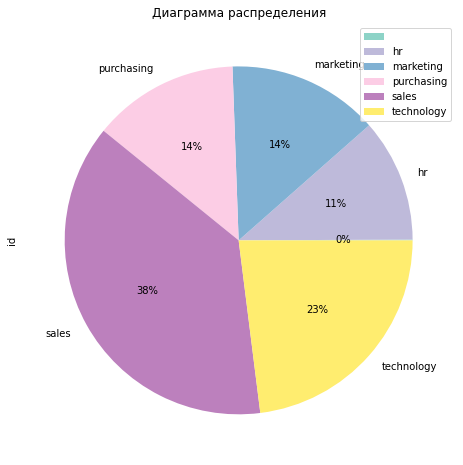

In [47]:
category_info(test_features, 'dept')

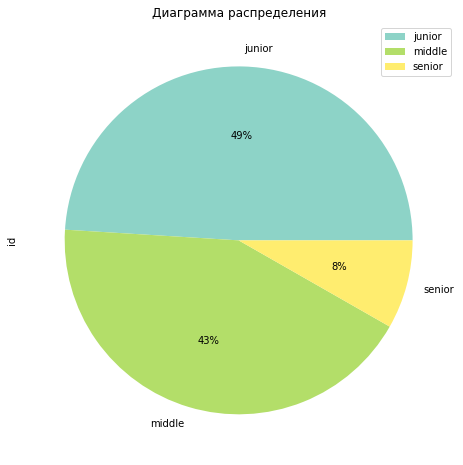

In [48]:
category_info(test_features, 'level')

Вывод: наблюдается дисбаланс - класс senior представляет всего 8% от выборки.

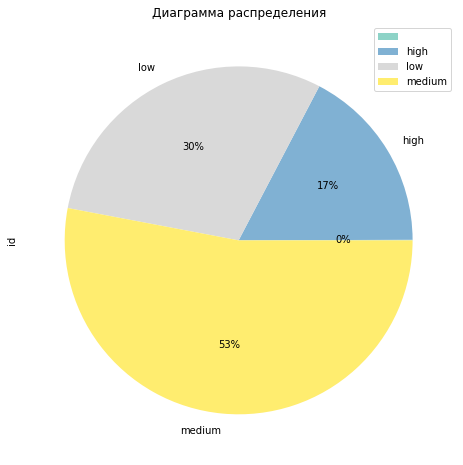

In [49]:
category_info(test_features, 'workload')

Вывод: наблюдается дисбаланс - класс medium представляет 51% от выборки.

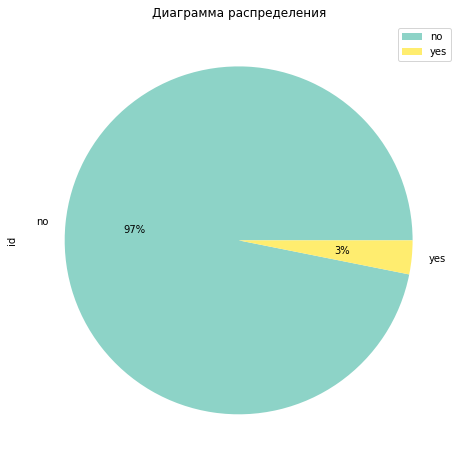

In [50]:
category_info(test_features, 'last_year_promo')

Вывод: наблюдается дисбаланс - класс yes представляет всего 3% от выборки.

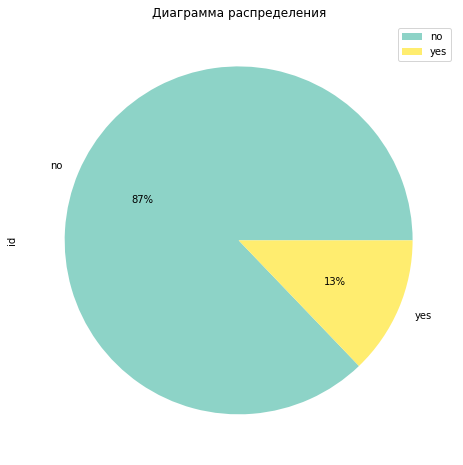

In [51]:
category_info(test_features, 'last_year_violations')

Вывод: наблюдается дисбаланс - класс yes представляет всего 13% от выборки.

## Шаг 4. Корреляционный анализ

In [52]:
train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   4000 non-null   object 
 2   level                  4000 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [53]:
# Словарь с порядком категорий для каждого столбца

total_rate = train_job_satisfaction_rate.copy(deep=True)

category_orders = {
    'dept': ['sales', 'purchasing', 'marketing', 'technology', 'hr'],
    'level': ['junior', 'middle', 'sinior'],
    'workload': ['low', 'medium', 'high'],
    'last_year_promo': ['no', 'yes'],
    'last_year_violations': ['no', 'yes']
}

# Примените кодирование для каждого столбца
for col, order in category_orders.items():
    total_rate[f'{col}_cat'] = pd.Categorical(total_rate[col], categories=order, ordered=True).codes

In [54]:
total_rate = total_rate.drop(columns=['level', 'dept', 'workload', 'last_year_promo', 'last_year_violations'], axis=1)

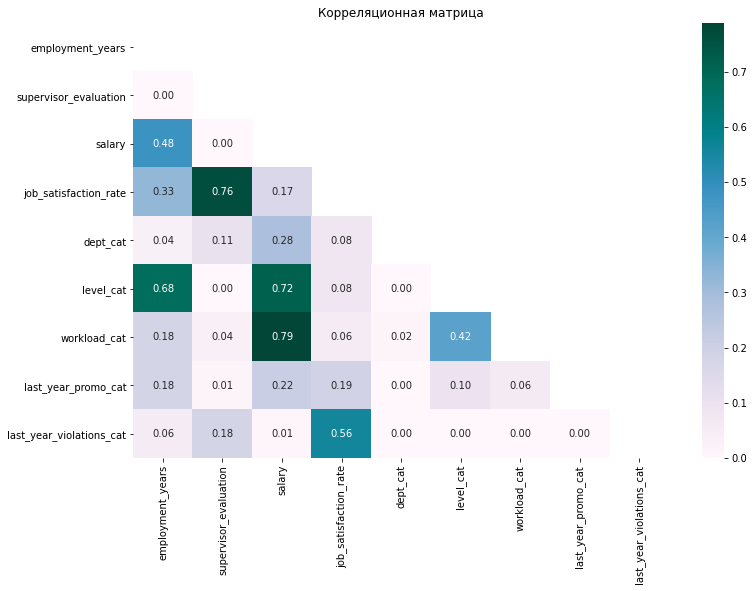

In [55]:
total_rate = total_rate.set_index('id')
phik_matrix = total_rate.phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'])
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="PuBuGn", mask=mask)
plt.title("Корреляционная матрица")
plt.show()

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

Корреляция с целевой переменной (job_satisfaction_rate):

    supervisor_evaluation: Корреляция 0.76 — это очень сильная положительная связь. Оценка руководителя сильно влияет на удовлетворённость сотрудника. Это ключевой признак.
    salary: Корреляция 0.33 — умеренная положительная связь. Зарплата также влияет на удовлетворённость, но меньше, чем оценка руководителя.
    employment_years: Корреляция 0.17 — слабая положительная связь. Длительность работы в компании имеет небольшое влияние на удовлетворённость.
    
Наиболее значимый признак — supervisor_evaluation. Зарплата и длительность работы в компании также имеют некоторое влияние, но гораздо меньшее.

Корреляция между признаками:

    salary и level_cat: Корреляция 0.68 — сильная положительная связь. Это ожидаемо, так как уровень должности обычно влияет на зарплату.
    salary и supervisor_evaluation: Корреляция 0.48 — умеренная положительная связь. Оценка руководителя может влиять на зарплату.
    workload_cat и level_cat: Корреляция 0.79 — очень сильная положительная связь. Уровень загруженности зависит от уровня должности.
    employment_years и level_cat: Корреляция 0.72 — сильная положительная связь. Длительность работы в компании связана с уровнем должности.
    last_year_promo_cat и level_cat: Корреляция 0.21 — слабая положительная связь. Повышение за последний год слабо связано с уровнем должности.

Некоторые признаки сильно коррелируют между собой (например, salary и level_cat, workload_cat и level_cat). Это может указывать на мультиколлинеарность, что стоит учитывать при построении моделей.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

## Шаг 4 Решение первой задачи. 

In [56]:
from sklearn.model_selection import train_test_split

# ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

RANDOM_STATE = 42
TEST_SIZE = 0.4

# загружаем данные
df_full = train_job_satisfaction_rate.copy(deep=True)
df_full = df_full.set_index('id')

y_train = df_full['job_satisfaction_rate']
X_train = df_full.drop(['job_satisfaction_rate'], axis=1)

In [57]:
display('Количество дубликатов X_train:', X_train.duplicated().sum())

'Количество дубликатов X_train:'

1500

In [58]:
X_train.drop_duplicates(inplace=True, ignore_index=False)

# Проверка
display('Количество дубликатов X_train:', X_train.duplicated().sum())
display(X_train.head())

'Количество дубликатов X_train:'

0

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000
653870,hr,junior,high,2,no,no,5,38400
184592,sales,junior,low,1,no,no,2,12000
171431,technology,junior,low,4,no,no,2,18000
693419,hr,junior,medium,1,no,no,3,22800


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Так как мы удалили признак "id" с неповторяющимися значениями, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии обучающей таблицы.</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span>  ❌\
<span style="color: darkorange">Удалять дубликаты нужно после удаления id, но ДО удаления таргета! Разные таргеты при одинаковых входных данных - это не полные дубликаты и несут ценную информацию в модель. </span>

In [59]:
test_features = test_features.set_index('id')
test_target_job_satisfaction_rate = test_target_job_satisfaction_rate.set_index('id')

test_full = test_features.merge(test_target_job_satisfaction_rate, right_index=True, left_index=True)

X_test = test_full.drop(['job_satisfaction_rate'], axis=1)
y_test = test_full['job_satisfaction_rate']

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Верно, при объединении таблиц нужно привязаться к уникальному `"id"`.</font>

In [60]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(2500, 8)

(2000, 8)

(4000,)

(2000,)

In [61]:
y_train = y_train[y_train.index.isin(X_train.index)]
y_train.shape

(2500,)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Все импорты должны быть в первой ячейке татрадки, что бы сразу были видны все зависимости кода.</font>

In [62]:
from sklearn.metrics import make_scorer, roc_auc_score
#создаем метрику SMAPE
def SMAPE(y_test, y_predict):
    numerator = np.abs(y_predict - y_test)
    denominator = (np.abs(y_test) + np.abs(y_predict)) / 2
    diff = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator != 0)
    return np.mean(diff) * 100
    return sum 

smape_score = make_scorer(SMAPE, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️ <br>
<font color='green'>Верно, что не забываешь указать greater_is_better=False, Это пригодится для SearchCV. SMAPE — ошибка, её минимизируем.</font>

In [63]:
RANDOM_STATE = 42
# Cоздаём списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

# Cоздаём пайплайны для подготовки признаков 
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

ord_pipe = Pipeline([
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'senior'],
            ['low', 'medium', 'high']
        ],
        handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# Cоздаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
     ],
    remainder='passthrough'
)

# Cоздаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что разделяешь категории на порядковые и номинальные.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что есть обработка неизвестых категорий (можно не удалять `'_'` вручную из тестовых данных.)</font>

In [64]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

param_grid_test = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 21),
        'models__min_samples_leaf': range(1, 6),
        'models__min_samples_split': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },

    {
        'models': [KNeighborsRegressor(n_jobs=-1, weights='distance')],
        'models__n_neighbors': range(5, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
]

# Создаем пустые списки для таблицы результатов 
models = []
train_score = []
test_score = []

# Шаблон таблицы результатов
results = pd.DataFrame(columns=['model', 'SMAPE_train'])
i = 0

search = RandomizedSearchCV(
    pipe_final,
    param_grid_test,
    n_jobs=-1,
    cv=10,
    n_iter=30,
    scoring=smape_score,
    random_state=RANDOM_STATE
)

# Обучаем модель
search.fit(X_train, y_train)
   
print('SMAPE лучшей модели на кросс-валидации по обучающей выборке:', search.best_score_)
print('---')

SMAPE лучшей модели на кросс-валидации по обучающей выборке: -17.716913159775025
---


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='darkorange'> Нужно вывести результаты оценки Топ-10 лучших моделей, для анализа.</font>

In [65]:
y_predict = search.best_estimator_.predict(X_test)

print('SMAPE лучшей модели на тестовой выборке:', SMAPE(y_predict, y_test))
print('---')

SMAPE лучшей модели на тестовой выборке: 13.776375738247532
---


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Выбирать модели на тестовых данных нельзя - так мы подстраиваемся конкретно под тестовую выборку. Тестирование проводится только для лучшей модели отобранной по результатам кросс-валидации.~~</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> \
<font color='blue'> Посмотри, пожалуйста, Спринт 11/20 → Тема 9/11: Пайплайны → Уроки 5 и 6. Там есть код подбора параметров и предобработчиков для нескольких моделей без цикла.</font>

<font color='blue'><b>Комментарий ревьюера : </b></font> ⚠️\
<font color='darkorange'> Нам нужно посмотреть все параметры моделей, включая предобработку.</font>

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

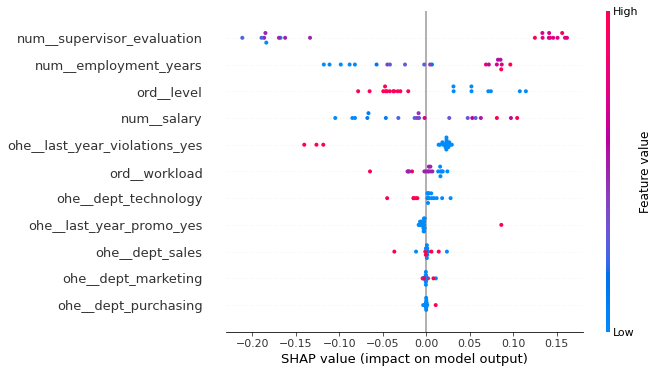

In [66]:
# Подготовим данные для SHAP-анализа
shap.initjs()

best_pipeline = search.best_estimator_

X_train_shap = pd.DataFrame(
    best_pipeline.named_steps['preprocessor'].fit_transform(X_train), 
    columns= best_pipeline.named_steps['preprocessor'].get_feature_names_out()
)
X_test_shap = pd.DataFrame(
    best_pipeline.named_steps['preprocessor'].transform(X_test), 
    columns= best_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

best_model = best_pipeline.named_steps['models']

# Создаем Explainer
explainer = shap.KernelExplainer(best_model.predict, X_test_shap[:20])

# Получаем SHAP-значения для данных
shap_values = explainer(X_test_shap[:20])

# Визуализиурем важность признаков
shap.plots.beeswarm(shap_values, max_display=21) 

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> ~~Препроцессор нужно то же взять из Лучшей модели, выбранной выше (`search.best_estimator_`)~~</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Препроцессор в `best_pipeline` уже обученный.</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Для ускорения расчётов можно применять сэмплирование `shap.sample()` или `shap.kmeans()`, а не первые 20 строк.</span>

Вывод: Признак supervisor_evaluation оказывает наибольшее влияние на предсказания модели, что подтверждает нашу гипотезу о важности этого фактора, выдвинутую еще на этапе корреляционного анализа. На втором месте по значимости находится признак employment_years. Это говорит о том, что количество лет, проведенных сотрудником в компании, также играет важную роль в прогнозировании уровня удовлетворенности работой, сопоставимую с такими факторами, как занимаемая должность и уровень заработной платы.

### Выводы:



Сначала мы создали собственную метрику - SMAPE (симметричное среднее абсолютное процентное отклонение)

После перебрали гиперпараметры 2-х моделей в пайплайне при помощи RandomizedSearchCV:

LinearRegression  
DecisionTreeRegressor  

Отметили, что 

Лучшая модель: decision_tree_search('preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 2, 'models__max_depth': 9)  
Лучшее значение метрики на тестовой выборке: 13.776375738247532


<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~НЕ увидел таких значений метрики.~~</span>

# Задача 2: предсказание увольнения сотрудника из компании

## Загрузка данных

In [67]:
plt.rcParams["figure.figsize"] = (8, 8)

pth_train_quit = '/datasets/train_quit.csv'
pth_test_features = '/datasets/test_features.csv'
pth_test_target_quit = '/datasets/test_target_quit.csv'

if os.path.exists(pth_train_quit):
    train_quit = pd.read_csv(pth_train_quit, sep=',')
else:
    print('Something is wrong')
    
if os.path.exists(pth_test_features):
    test_target_quit = pd.read_csv(pth_test_target_quit, sep=',')
else:
    print('Something is wrong')
    
test_features = X_test.copy()

In [68]:
data_info(train_quit)

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB

5 случайных строк их датасета:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
1477,812686,technology,middle,medium,9,no,no,3,51600,no
1294,817898,marketing,middle,medium,1,no,no,2,34800,no
43,894283,marketing,junior,medium,1,no,no,4,24000,no
3981,331312,sales,junior,medium,2,no,no,3,25200,no
203,813659,marketing,junior,medium,2,no,no,4,31200,no



Описание данных:



,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0



Количество пропусков:



id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


Количество явных дубликатов:



0

Вывод: обработка данных не требуется

In [69]:
data_info(test_features)

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   2000 non-null   object
 1   level                  2000 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB

5 случайных строк их датасета:



,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
952256,technology,middle,high,6,no,no,4,56400
266551,sales,junior,medium,2,no,yes,1,26400
466840,purchasing,senior,high,10,no,no,5,66000
905728,sales,middle,medium,1,no,no,5,33600
705336,technology,junior,low,1,no,yes,1,21600



Описание данных:



,count,mean,std,min,25%,50%,75%,max
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.0,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.0,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.0,96000.0



Количество пропусков:



dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


Количество явных дубликатов:



560

Вывод: есть пропущенные значения в столбцах dept и level.

In [70]:
data_info(test_target_quit)

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB

5 случайных строк их датасета:



,id,quit
688,529146,yes
475,803008,no
113,672092,no
623,647748,yes
1879,435668,no



Описание данных:



,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0



Количество пропусков:



id      0
quit    0
dtype: int64


Количество явных дубликатов:



0

Вывод: на первом этапе с данными все хорошо. 

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Предобработка данных 

In [71]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [72]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [73]:
train_quit['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [74]:
train_quit['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

In [75]:
#исправим опечатку
train_quit['level'].replace({'sinior': 'senior'}, inplace=True)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [76]:
train_quit['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [77]:
train_quit['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [78]:
train_quit['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [79]:
train_quit['quit'].unique()

array(['no', 'yes'], dtype=object)

In [80]:
test_features.describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


In [81]:
test_features.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [82]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', ' '],
      dtype=object)

In [83]:
test_features['level'].unique()

array(['junior', 'middle', 'senior'], dtype=object)

In [84]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [85]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [86]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [87]:
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


### Исследовательский анализ. 

In [88]:
train_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [89]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


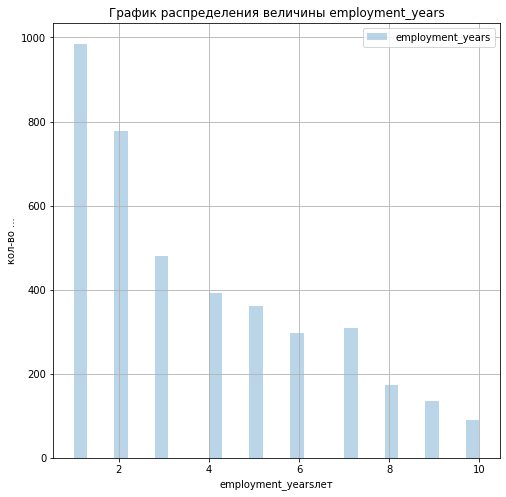

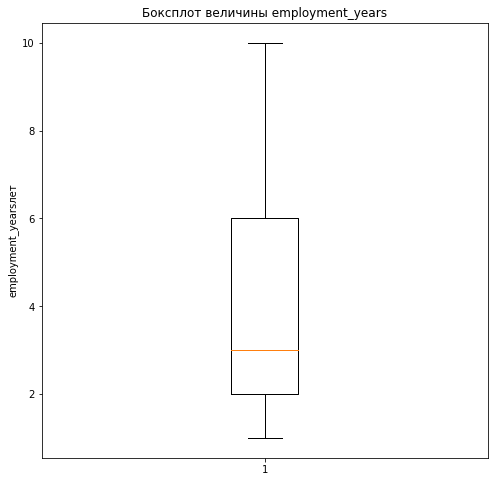

In [90]:
hist_show(train_quit, 'employment_years', bins=30, measure='лет')

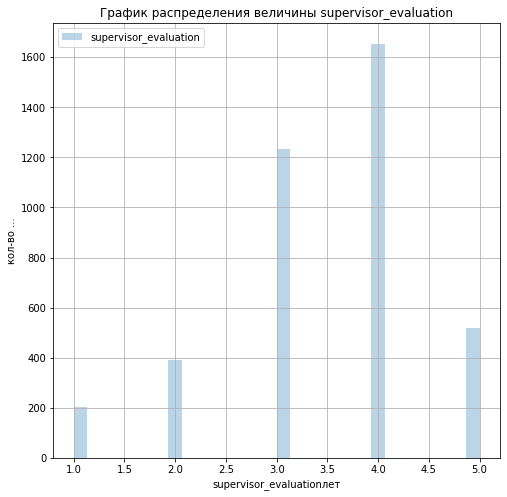

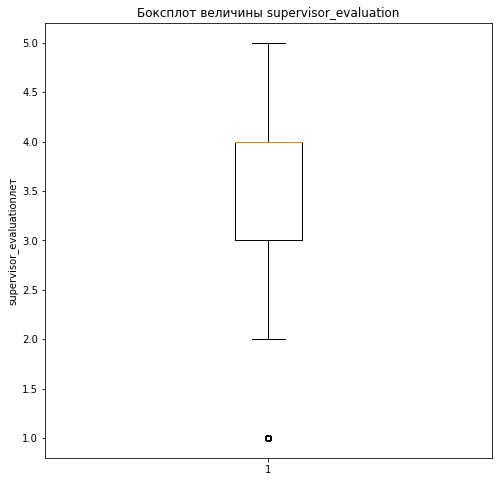

In [91]:
hist_show(train_quit, 'supervisor_evaluation', bins=30, measure='лет')

Вывод: нормальное распределение со смещением вправо.

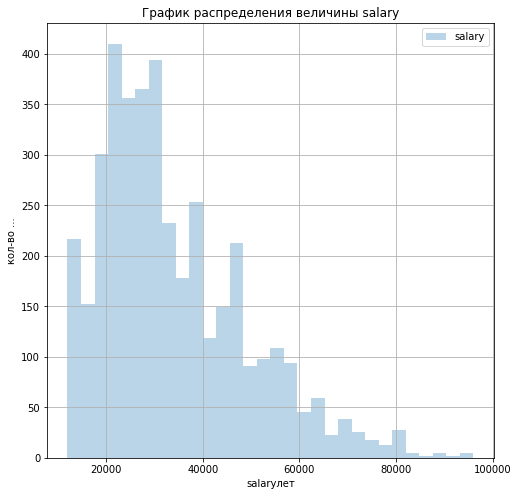

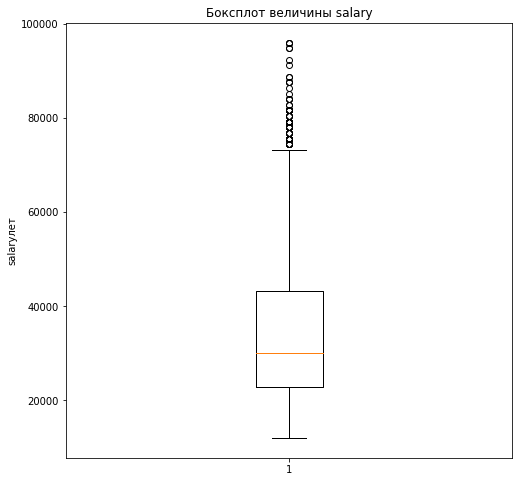

In [92]:
hist_show(train_quit, 'salary', bins=30, measure='лет')

In [93]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   2000 non-null   object
 1   level                  2000 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB


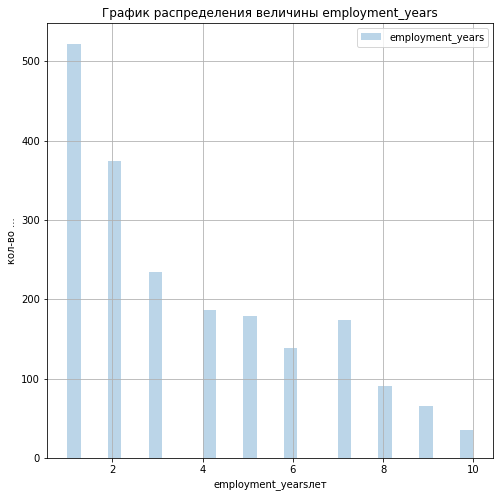

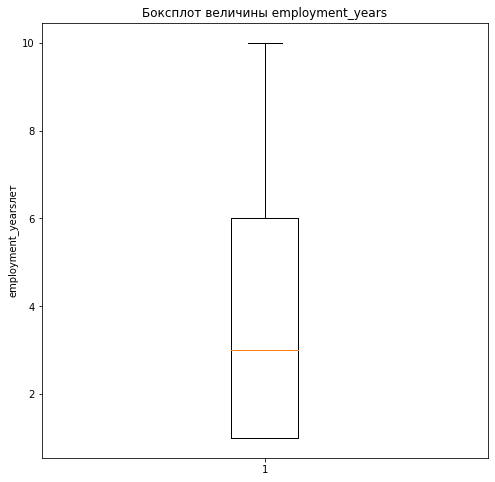

In [94]:
hist_show(test_features, 'employment_years', bins=30, measure='лет')

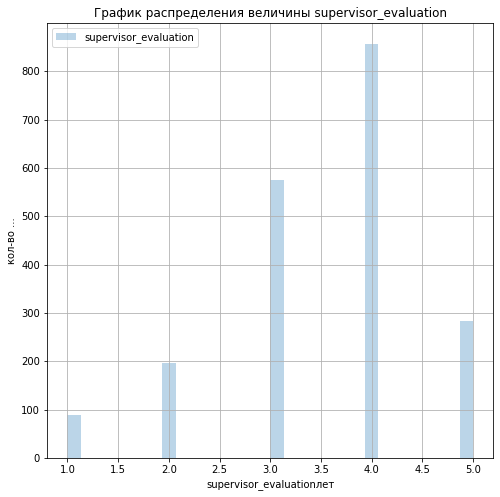

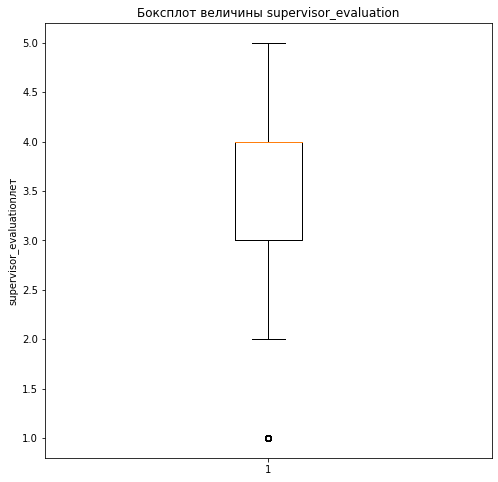

In [95]:
hist_show(test_features, 'supervisor_evaluation', bins=30, measure='лет')

Вывод: нормальное распределение со смещением вправо.

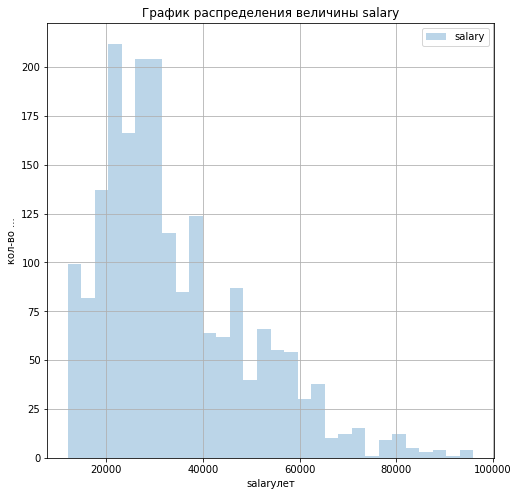

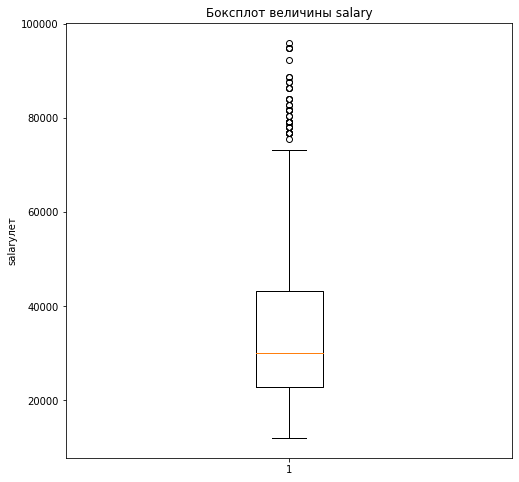

In [96]:
hist_show(test_features, 'salary', bins=30, measure='лет')

In [97]:
def category_info(data, column):
    data.groupby(column).sum().plot(kind='pie', y='id', autopct='%1.0f%%',
     colors = plt.cm.Set3(np.linspace(0, 1, len(data[column].unique()))),
     title='Points Scored by Team') 
    plt.title('Диаграмма распределения')

In [98]:
train_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

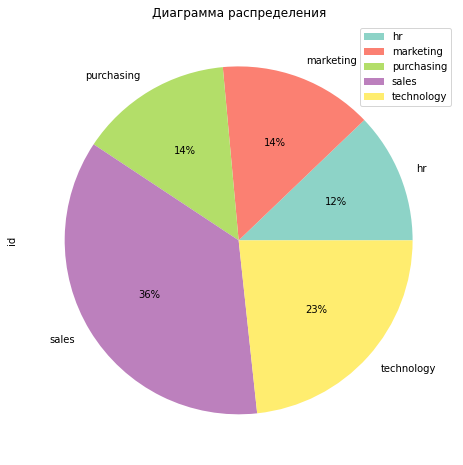

In [99]:
category_info(train_quit, 'dept')

Вывод: Выборка более-менее сбалансирована относительно других категорий.

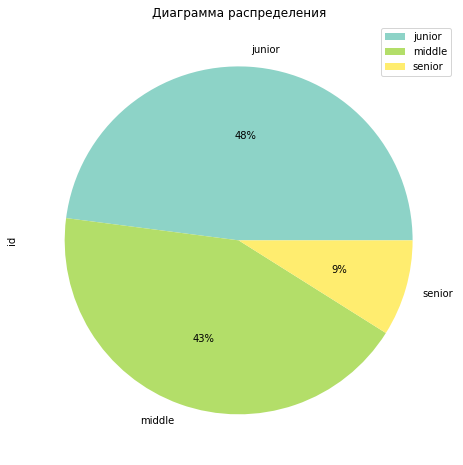

In [100]:
category_info(train_quit, 'level')

Вывод: Выборка несбалансирована - класс "senior" представляет лишь 9% выборки.

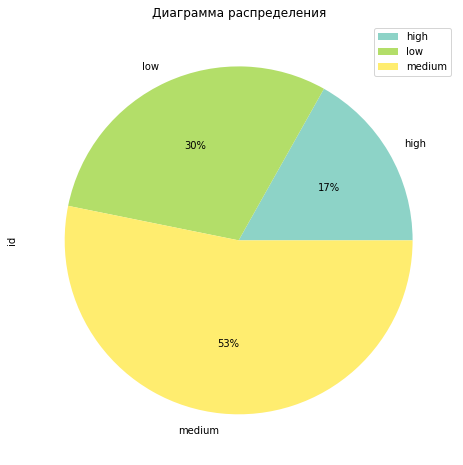

In [101]:
category_info(train_quit, 'workload')

Вывод: выборка несбалансирована - класс "medium" представляет чуть больше половины выборки.

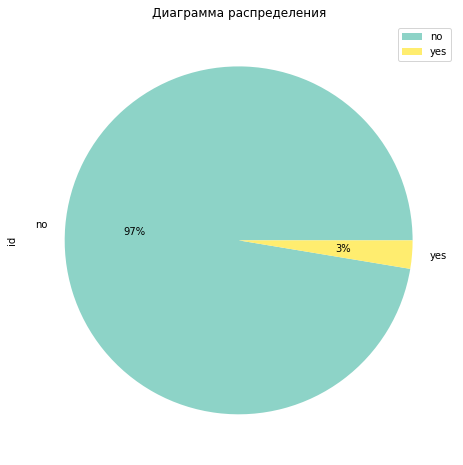

In [102]:
category_info(train_quit, 'last_year_promo')

Вывод: наблюдаем чуть ли не 100%-ый перевес класса "no" - учтем это при обучении модели.

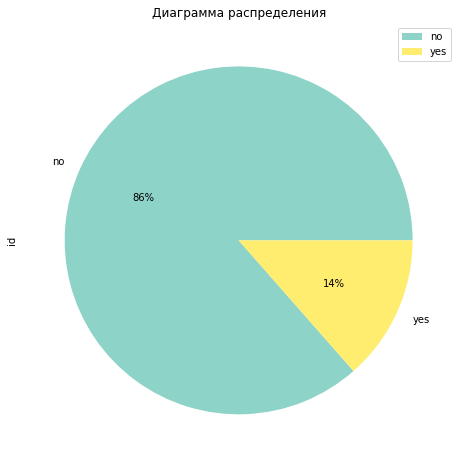

In [103]:
category_info(train_quit, 'last_year_violations')

Вывод: в этой категории также наблюдаем значительный перевес класса "no" - учтем это при обучении модели. 

In [104]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


### Портрет уволившегося сотрудника.

In [105]:
total_df = train_quit.copy()
# Словарь с порядком категорий для каждого столбца
category_orders = {
    'dept': ['sales', 'purchasing', 'marketing', 'technology', 'hr'],
    'level': ['junior', 'middle', 'sinior'],
    'workload': ['low', 'medium', 'high'],
    'last_year_promo': ['no', 'yes'],
    'last_year_violations': ['no', 'yes'],
    'quit': ['no', 'yes'],
}

# Примените кодирование для каждого столбца
for col, order in category_orders.items():
    total_df[f'{col}_cat'] = pd.Categorical(total_df[col], categories=order, ordered=True).codes

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Распределение категорий в данных неравномерное, поэтому нужно нормализовать количество ушедших относительно исследуемого признака, Например из какого департамента уходят чаще, оносительно количества работающих в департаменте.\
Сделать это можно сгруппировав данные по признаку и посчитать долю таргета в каждом из значений (`.groupby(['dept'])['quit'].value_counts(normalize=True)`)~~</font>

In [106]:
#total_df = total_df.drop(columns=['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit'], axis=1)

In [107]:
total_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,dept_cat,level_cat,workload_cat,last_year_promo_cat,last_year_violations_cat,quit_cat
0,723290,sales,middle,high,2,no,no,4,54000,no,0,1,2,0,0,0
1,814010,sales,junior,medium,2,no,no,4,27600,no,0,0,1,0,0,0
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,1,1,1,0,0,0
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0,0,1,0,1,1
4,910140,marketing,junior,medium,2,no,no,5,25200,no,2,0,1,0,0,0


In [108]:
#составим матрицу коррелляции, для определения наиболее важных признаков для уволившегося сотрудника. 
phik_matrix = total_df.drop('id', axis=1).phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary'])
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

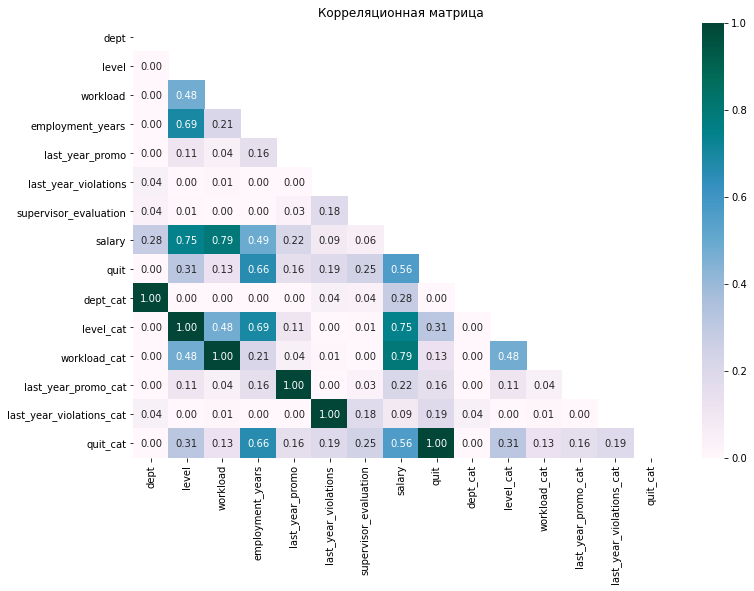

In [109]:
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="PuBuGn", mask=mask)
plt.title("Корреляционная матрица")
plt.show()

Переменные и их корреляции:

employment_years (длительность работы в компании):

    salary: Корреляция 0.49 — средняя положительная зависимость. Сотрудники с большим стажем получают более высокую зарплату.
    level_cat: Корреляция 0.69 - сильная положительная зависимость. Сотрудники с большим стажем занимают более высокие должности.
    quit_cat: Корреляция 0.66 — сильная положительная зависимость. Сотрудники с большим стажем чаще увольняются. Это может быть связано с тем, что они достигли потолка в карьерном росте или испытывают усталость от работы.

    
supervisor_evaluation (оценка руководителя):

    Переменная слабо коррелирует с целевой переменной. 
    
salary (зарплата):

    debt_cat: Корреляция 0.28 — слабая отрицательная зависимость, возможно, в некоторых отделах зарплаты выше.
    level_cat: Корреляция 0.75 — сильная положительная зависимость. Логично, так как более высокие должности обычно сопровождаются более высокой зарплатой.
    workload: Корреляция 0.79 — сильная положительная зависимость, что может указывать на то, что более загруженные сотрудники получают более высокую зарплату. Эможет приводить к выгоранию и, как следствие, увольнению.
    quit_cat: Корреляция 0.56 — средняя положительная зависимость. Интересно, что сотрудники с более высокой зарплатой чаще увольняются. Возможно это связано с тем, что такие сотрудники имеют больше возможностей для перехода в другие компании или начинают собственные проекты.
    
level_cat (уровень должности):

    workload: Корреляция 0.48 — умеренная положительная зависимость, вероятно, более высокие должности связаны с большей загруженностью, что также может способствовать решению об уходе.


In [110]:
total_df.groupby(['dept'])['quit'].value_counts(normalize=True)

dept        quit
hr          no      0.750000
            yes     0.250000
marketing   no      0.719931
            yes     0.280069
purchasing  no      0.717687
            yes     0.282313
sales       no      0.716968
            yes     0.283032
technology  no      0.702586
            yes     0.297414
Name: quit, dtype: float64

In [111]:
total_df.groupby(['level'])['quit'].value_counts(normalize=True)

level   quit
junior  yes     0.514623
        no      0.485377
middle  no      0.936246
        yes     0.063754
senior  no      0.952381
        yes     0.047619
Name: quit, dtype: float64

In [112]:
total_df.groupby(['workload'])['quit'].value_counts(normalize=True)

workload  quit
high      no      0.820475
          yes     0.179525
low       no      0.570364
          yes     0.429636
medium    no      0.769594
          yes     0.230406
Name: quit, dtype: float64

In [113]:
total_df_quit_yes = total_df.query("quit == 'yes' ")
total_df_quit_no = total_df.query("quit == 'no' ")

In [114]:
print('Среднее время работы уволившегося сотрудника в компании:', total_df_quit_yes['employment_years'].mean())

Среднее время работы уволившегося сотрудника в компании: 1.8448581560283688


In [115]:
print('Средняя ЗП уволившихся сотрудников:', total_df_quit_yes['salary'].median())
print('Средняя ЗП работающих сотрудников:', total_df_quit_no['salary'].median())
print('Средняя разница в зарплатах:', total_df_quit_yes['salary'].median() - total_df_quit_no['salary'].median())

Средняя ЗП уволившихся сотрудников: 22800.0
Средняя ЗП работающих сотрудников: 34800.0
Средняя разница в зарплатах: -12000.0


Портрет уволившегося сотрудника:  

    Скорее всего, он работает в отделе продаж.  
    Занимает должность junior.  
    Имеет низкую или среднюю загруженность.  
    В среднем проработал в компании 1-2 года.  
    В среднем зарабатывает 22 800, что на 12 000 меньше среднего уровня зарплаты других сотрудников.  
    Также было подтверждено, что уровень удовлетворенности работой влияет на вероятность увольнения.
    Уровень удовлетворенности (JSR) у уволившихся сотрудников почти в два раза ниже, чем у оставшихся (в   среднем 0.39 по сравнению с 0.61).

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ⚠️\
<span style="color: darkorange"> Поправь выводы по расчётам в разрезе группы.</span>

### Проверка гипотезы. 

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников.

In [116]:
final_df =  pd.merge(test_target_quit, test_target_job_satisfaction_rate, on='id', how='outer')
final_df.head(1)

,id,quit,job_satisfaction_rate
0,999029,yes,0.35


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [117]:
target_dependence_resigned = final_df.query('quit == "yes"')['job_satisfaction_rate']
target_dependence_not_resigned = final_df.query('quit == "no"')['job_satisfaction_rate']
display(len(target_dependence_resigned))
display(len(target_dependence_not_resigned))

564

1436

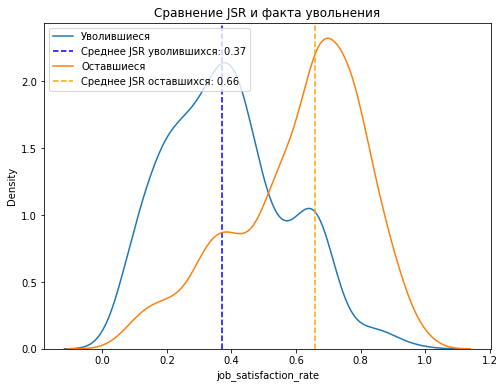

In [118]:
fig, axes = plt.subplots(figsize=(8, 6))

# График №1
sns.kdeplot(
    data=target_dependence_resigned,
    label='Уволившиеся',
    ax=axes
)

# Медиана для графика №1
mean_resigned = target_dependence_resigned.median()
axes.axvline(
    mean_resigned,
    color='blue',
    linestyle='--',
    label=f'Среднее JSR уволившихся: {mean_resigned:.2f}'
)

# График №2
sns.kdeplot(
    data=target_dependence_not_resigned,
    label='Оставшиеся',
    ax=axes
)

# Медиана для графика №2
mean_not_resigned = target_dependence_not_resigned.median()
axes.axvline(
    mean_not_resigned,
    color='orange', linestyle='--',
    label=f'Среднее JSR оставшихся: {mean_not_resigned:.2f}'
)

axes.set_title('Сравнение JSR и факта увольнения')
plt.legend(loc='upper left')
plt.show()

In [119]:
print('Среднее JSR уволившихся сотрудников:', target_dependence_resigned.mean())
print('Среднее JSR оставшихся сотрудников:', target_dependence_not_resigned.mean())

Среднее JSR уволившихся сотрудников: 0.38771276595744686
Среднее JSR оставшихся сотрудников: 0.6120403899721448


Действительно, уровень удовлетворённости сотрудника работой в компании (JSR) оказывает значительное влияние на вероятность увольнения. У сотрудников, которые уволились, средний показатель JSR практически в два раза ниже, чем у тех, кто остался в компании: 0.39 против 0.61. Это подчеркивает важность удовлетворённости работой как ключевого фактора, влияющего на текучесть кадров.

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Добавление нового входного признака.

На предыдущем шаге мы убедились, что job_satisfaction_rate и quit действительно связаны.

In [120]:
train_quit_merge = train_quit.set_index('id')
train_quit_merge.head(1)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [121]:
train_quit.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no


In [122]:
quit_train_JSR = search.best_estimator_.predict(train_quit)
quit_train_JSR

array([0.62833333, 0.844     , 0.35111111, ..., 0.545     , 0.53833333,
       0.50857143])

In [123]:
X_train = train_quit.copy(deep=True)
X_train['job_satisfaction_rate'] = quit_train_JSR
X_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.628333
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.844000
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.351111
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.348750
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.806667


In [124]:
X_test_full = X_test.copy(deep=True)
X_test_full['job_satisfaction_rate'] = y_predict
X_test_full.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.888000
686555,hr,junior,medium,1,no,no,4,30000,0.668750
467458,sales,middle,low,5,no,no,4,19200,0.668333
418655,sales,middle,low,6,no,no,4,19200,0.668333
789145,hr,middle,medium,5,no,no,5,40800,0.808571


In [125]:
X_test_full = X_test_full.merge(test_target_quit, on='id')
X_test_full.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.888000,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.668750,no
2,467458,sales,middle,low,5,no,no,4,19200,0.668333,no
3,418655,sales,middle,low,6,no,no,4,19200,0.668333,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.808571,no


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Отлично, что добавляется предсказание предыдущей модели.</font>

## Подготовка данных.

In [126]:
# Выделяем таргет в тренировочной выборке
y_train = X_train['quit']

X_train = X_train.drop('quit', axis=1)
#X_test_full = X_test_full.merge(test_target_quit, right_index=True, left_index=True)
y_test = X_test_full['quit']
X_test = X_test_full.drop('quit', axis=1)

display(X_train.head(1))
display(X_train.shape)
print('---')
display(y_train.head(5))
display(y_train.shape)
print('---')
display(X_test.head(1))
display(X_test.shape)
print('---')
display(y_test.head(5))
display(y_test.shape)
print('---')
display('Количество дубликатов X_train после корректировок:', X_train.duplicated().sum())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0.628333


(4000, 10)

---


0     no
1     no
2     no
3    yes
4     no
Name: quit, dtype: object

(4000,)

---


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.888


(2000, 10)

---


0    no
1    no
2    no
3    no
4    no
Name: quit, dtype: object

(2000,)

---


'Количество дубликатов X_train после корректировок:'

0

In [127]:
X_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.888000
1,686555,hr,junior,medium,1,no,no,4,30000,0.668750
2,467458,sales,middle,low,5,no,no,4,19200,0.668333
3,418655,sales,middle,low,6,no,no,4,19200,0.668333
4,789145,hr,middle,medium,5,no,no,5,40800,0.808571
...,...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400,0.526000
1996,109582,technology,middle,low,3,no,no,2,21600,0.156667
1997,305653,technology,junior,low,1,no,no,3,14400,0.245000
1998,160233,technology,middle,low,8,no,no,1,32400,0.433333


In [128]:
X_train.drop_duplicates(inplace=True, ignore_index=False)

# Проверка
display('Количество дубликатов quit_X_train_ml после удаления:', X_train.duplicated().sum())
display(X_train.head())
display(X_train.shape)

y_train = y_train[y_train.index.isin(y_train.index)]
y_train.shape

'Количество дубликатов quit_X_train_ml после удаления:'

0

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0.628333
1,814010,sales,junior,medium,2,no,no,4,27600,0.844000
2,155091,purchasing,middle,medium,5,no,no,1,37200,0.351111
3,257132,sales,junior,medium,2,no,yes,3,24000,0.348750
4,910140,marketing,junior,medium,2,no,no,5,25200,0.806667


(4000, 10)

(4000,)

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Индексы в quit_X_test_ml и test_target_quit не совпадают и сейчас таргеты не соотвествуют своим фичам. Нужно согласовать данные по общему униакальному признаку, в данном случае подойдёт 'id'.~~</font>

## Обучение модели

In [129]:
from sklearn.linear_model import LinearRegression, LogisticRegression
# Добавляем новый признак в preprocessor
num_columns.append('job_satisfaction_rate')
# Обновляем модель в итоговом пайплайне
pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

In [130]:
X_train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0.628333
1,814010,sales,junior,medium,2,no,no,4,27600,0.844000
2,155091,purchasing,middle,medium,5,no,no,1,37200,0.351111
3,257132,sales,junior,medium,2,no,yes,3,24000,0.348750
4,910140,marketing,junior,medium,2,no,no,5,25200,0.806667
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,0.510000
3996,672059,sales,middle,high,9,no,no,4,52800,0.885000
3997,536432,purchasing,junior,low,2,no,yes,4,12000,0.545000
3998,692133,purchasing,middle,medium,2,no,no,4,33600,0.538333


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Датафреймы лучше всегда ограничивать методами .head(), .tail(), sample(). Иначе в выводах ячейки записывается весь Датафрейм, хоть он и не выводится на экран полностью. Такие Аутпуты сильно перегружают тетрадку.</font>

In [131]:
X_train = X_train.reset_index(drop=True)

In [132]:
X_test = X_test.reset_index(drop=True)

In [133]:
# Новый порядок столбцов
new_order = ['workload', 'dept', 'salary', 'level', 'last_year_violations', 'employment_years', 'last_year_promo', 'supervisor_evaluation', 'job_satisfaction_rate']

# Изменение порядка
X_train = X_train.reindex(columns=new_order)
X_test = X_test.reindex(columns=new_order)

In [134]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# Создаем сетку гиперпараметров для множества моделей
param_grid_test_2 = [
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', solver='liblinear')],
        'models__penalty': ['l1', 'l2'],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 10),
        'models__min_samples_leaf': range(1, 5),
        'models__min_samples_split': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },


    {
        'models': [KNeighborsClassifier(n_jobs=-1, weights='distance')],
        'models__n_neighbors': range(5, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }
]

models_clf = []
train_score_clf = []
test_score_clf = []
best_score_clf = 0

score_table_clf = {
    'model': models_clf,
    'train_roc_auc': train_score_clf,
    'test_roc_auc': test_score_clf,
}


In [135]:
X_train.head()

,workload,dept,salary,level,last_year_violations,employment_years,last_year_promo,supervisor_evaluation,job_satisfaction_rate
0,high,sales,54000,middle,no,2,no,4,0.628333
1,medium,sales,27600,junior,no,2,no,4,0.844000
2,medium,purchasing,37200,middle,no,5,no,1,0.351111
3,medium,sales,24000,junior,yes,2,no,3,0.348750
4,medium,marketing,25200,junior,no,2,no,5,0.806667
...,...,...,...,...,...,...,...,...,...
3995,medium,sales,26400,junior,no,4,no,3,0.510000
3996,high,sales,52800,middle,no,9,no,4,0.885000
3997,low,purchasing,12000,junior,yes,2,no,4,0.545000
3998,medium,purchasing,33600,middle,no,2,no,4,0.538333


In [136]:
X_test.head()

,workload,dept,salary,level,last_year_violations,employment_years,last_year_promo,supervisor_evaluation,job_satisfaction_rate
0,medium,marketing,28800,junior,no,2,no,5,0.888000
1,medium,hr,30000,junior,no,1,no,4,0.668750
2,low,sales,19200,middle,no,5,no,4,0.668333
3,low,sales,19200,middle,no,6,no,4,0.668333
4,medium,hr,40800,middle,no,5,no,5,0.808571
...,...,...,...,...,...,...,...,...,...
1995,low,marketing,20400,junior,no,3,no,3,0.526000
1996,low,technology,21600,middle,no,3,no,2,0.156667
1997,low,technology,14400,junior,no,1,no,3,0.245000
1998,low,technology,32400,middle,no,8,no,1,0.433333


In [137]:
y_train.head()

0        no
1        no
2        no
3       yes
4        no
       ... 
3995     no
3996     no
3997    yes
3998     no
3999    yes
Name: quit, Length: 4000, dtype: object

In [138]:
y_test.head()

0        no
1        no
2        no
3        no
4        no
       ... 
1995    yes
1996    yes
1997    yes
1998     no
1999     no
Name: quit, Length: 2000, dtype: object

In [139]:
# Создаем пустые списки для таблицы результатов 
models = []
train_score = []
test_score = []

# Шаблон таблицы результатов
results = pd.DataFrame(columns=['model', 'SMAPE_train'])
i = 0

search = RandomizedSearchCV(
    pipe_final_2,
    param_grid_test_2,
    n_jobs=-1,
    cv=10,
    n_iter=30,
    scoring='roc_auc',
    random_state=RANDOM_STATE
)

# Обучаем модель
search.fit(X_train, y_train)
   
print('SMAPE лучшей модели на кросс-валидации по обучающей выборке:', search.best_score_)
print('---')

SMAPE лучшей модели на кросс-валидации по обучающей выборке: 0.921006441239349
---


In [140]:
search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'hig...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', 'passthrough',
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary',
                                                   'job_satisfaction_rate'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=4,
                                        min_samples_split=3,
                                        random_state=42))])

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='darkorange'> Нужно вывести результаты оценки Топ-10 лучших моделей, для анализа.</font>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~Выбираем по кросс-валидации.~~ </span>

In [141]:
y_predict = search.best_estimator_.predict_proba(X_test)[:, 1]
   
print('SMAPE лучшей модели на кросс-валидации по обучающей выборке:', roc_auc_score(y_test, y_predict))
print('---')

SMAPE лучшей модели на кросс-валидации по обучающей выборке: 0.9219796420316482
---


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Вывод: Сначала перебрали гиперпараметры 3-x моделей в пайплайне при помощи RandomizedSearchCV:

    LogisticRegression  
    DecisionTreeClassifier  
    KNeighborsClassifier  

После перебора нашли лучшую модель: DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=3,
                       random_state=42)

ROC-AUC на тестовой выборке -0.9219796420316482



<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

# Вывод: 

Первая задача: 

    Шаг 1-3.    
    
Провели предобработку данных и проанализировали их. В ходе исследовательского анализа данных было выявлено следующее: 

    В компании почти в два раза больше сотрудников с опытом работы до 3 лет, в то время как опытные специалисты представлены в меньшем количестве. Этот факт следует учитывать при настройке параметров модели в будущем.
    Наиболее распространённая оценка качества работы, которую сотрудники получают от руководителей, составляет 4.
    Медианная зарплата в компании составляет 30 000.
    Наибольшее количество сотрудников (38%) работает в отделе "продаж", однако наивысшее удовлетворение своей работой отмечают сотрудники отдела "закупок".
    47.5% сотрудников занимают должности junior, а примерно такое же количество (43.6%) — позиции middle. Сотрудники уровня middle наиболее удовлетворены своей работой.
    Большинство сотрудников (51,6%) имеют среднюю загруженность.

Явным фактором, влияющим на удовлетворение работой, является повышение в прошлом году или отсутствие нарушений.
Сотрудники, которые получили повышение в прошлом году или не имели замечаний, значительно более удовлетворены своей работой.
Уровень зарплаты существенно зависит от загруженности сотрудников и их отдела.

Был проведён корреляционный анализ, который показал умеренно-положительную корреляцию (0.5 < y < 0.8) с несколькими признаками:

    last_year_violations — 0.56. Это подтверждает, что замечания за нарушения трудового договора негативно сказываются на удовлетворённости сотрудников.
    supervisor_evaluation — 0.76. Это представляет собой наивысшую корреляцию целевого признака с данным показателем.

Решили не исключать признаки со слабой корреляцией, так как они могут оказаться важными для принятия решений модели.

Также были построены дополнительные графики, которые продемонстрировали нелинейную зависимость уровня удовлетворенности работой (job_satisfaction_rate) от коррелирующих признаков employment_years и supervisor_evaluation. Особенно интересна связь между целевым признаком и зарплатой сотрудников, что было учтено при моделировании.

     Шаг 4-5. 
     
Сначала мы создали собственную метрику - SMAPE (симметричное среднее абсолютное процентное отклонение)

После перебрали гиперпараметры 2-х моделей в пайплайне при помощи RandomizedSearchCV:

LinearRegression  
DecisionTreeRegressor  

Отметили, что 

Лучшая модель: decision_tree_search('preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 2, 'models__max_depth': 9)  
Лучшее значение метрики на тестовой выборке: 13.776375738247532



    Наибольшее влияние на предсказания модели оказывает признак supervisor_evaluation. Это подтверждает нашу гипотезу о значимости этого показателя, выдвинутую еще на этапе корреляционного анализа.
    На втором месте находится признак employment_years. Похоже, что уровень удовлетворенности сотрудников своей работой также зависит от этого фактора, примерно так же, как от занимаемой должности и уровня зарплаты.
    
Вторая задача: 

    Шаг 1-4.

Провели предобработку данных и проанализировали их. В ходе исследовательского анализа данных были выявлены следующие закономерности, а также был составлен портрет уволившегося сотрудника:

    employment_years (длительность работы в компании):

        salary: Корреляция 0.49 — средняя положительная зависимость. Сотрудники с большим стажем получают более высокую зарплату.
        level_cat: Корреляция 0.69 - сильная положительная зависимость. Сотрудники с большим стажем занимают более высокие должности.
        quit_cat: Корреляция 0.66 — сильная положительная зависимость. Сотрудники с большим стажем чаще увольняются. Это может быть связано с тем, что они достигли потолка в карьерном росте или испытывают усталость от работы.


    supervisor_evaluation (оценка руководителя):

        Переменная слабо коррелирует с целевой переменной. 

    salary (зарплата):

        debt_cat: Корреляция 0.28 — слабая отрицательная зависимость, возможно, в некоторых отделах зарплаты выше.
        level_cat: Корреляция 0.75 — сильная положительная зависимость. Логично, так как более высокие должности обычно сопровождаются более высокой зарплатой.
        workload: Корреляция 0.79 — сильная положительная зависимость, что может указывать на то, что более загруженные сотрудники получают более высокую зарплату. Эможет приводить к выгоранию и, как следствие, увольнению.
        quit_cat: Корреляция 0.56 — средняя положительная зависимость. Интересно, что сотрудники с более высокой зарплатой чаще увольняются. Возможно это связано с тем, что такие сотрудники имеют больше возможностей для перехода в другие компании или начинают собственные проекты.

    level_cat (уровень должности):

        workload: Корреляция 0.48 — умеренная положительная зависимость, вероятно, более высокие должности связаны с большей загруженностью, что также может способствовать решению об уходе.


    Портрет уволившегося сотрудника выглядит следующим образом:

    Скорее всего, он работает в отделе продаж.
    Занимает должность junior.
    Имеет низкую или среднюю загруженность.
    В среднем проработал в компании 1-2 года.
    В среднем зарабатывает 22 800, что на 12 000 меньше среднего уровня зарплаты других сотрудников.
    Также было подтверждено, что уровень удовлетворенности работой влияет на вероятность увольнения. Уровень удовлетворенности (JSR) у уволившихся сотрудников почти в два раза ниже, чем у оставшихся (в среднем 0.39 по сравнению с 0.61).
    
   Шаг 5-6.
    
 
 Сначала перебрали гиперпараметры 3-x моделей в пайплайне при помощи RandomizedSearchCV:

    LogisticRegression  
    DecisionTreeClassifier  
    KNeighborsClassifier  

После перебора нашли лучшую модель: DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=3,
                       random_state=42)

ROC-AUC на тестовой выборке -0.9219796420316482

# Рекомендации по удержанию сотрудников:

Важно обратить внимание на то, как оценивается работа сотрудников, поскольку они воспринимают это очень близко к сердцу, что напрямую влияет на их удовлетворенность рабочим местом.

Текучесть кадров — неизбежное явление в бизнесе. Возможно, стоит внедрить дополнительные интересные инициативы на ранних этапах работы (1-2 года), такие как корпоративы, социальные гарантии, премии и другие активности.

Необходимо также внимательно проанализировать отдел продаж и уровень зарплат сотрудников. Возможно, стоит рассмотреть варианты "закрепления" сотрудников в этом отделе на более длительный срок. Например, можно нормировать график, добавив возможность дистанционной работы.

Уровень удовлетворенности работой является ключевым фактором, влияющим на увольнение сотрудников, поэтому важно максимизировать "удовольствие" сотрудников от их работы. В этом случае отток кадров действительно может снизиться.

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Дарья, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>

<font color='blue'>К сожалению, проект не готов. Присылай законченную версию. По всем непонятным моментам можно обращаться за помощью наставникам и преподавателям, а также комьюнити студентов. Буду ждать :)

</font>